# Prediction using Unsupervised Machine Learning

## Importing necessory modules

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and displaying the data

In [2]:
names = ['sep_len','sep_wid','pet_len','pet_wid','species']
data = pd.read_csv(
    "/home/job/Downloads/datasets/iris.csv",names = names
)    
display(data.head())

,sep_len,sep_wid,pet_len,pet_wid,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Using Elbow method finding the optimal k-value

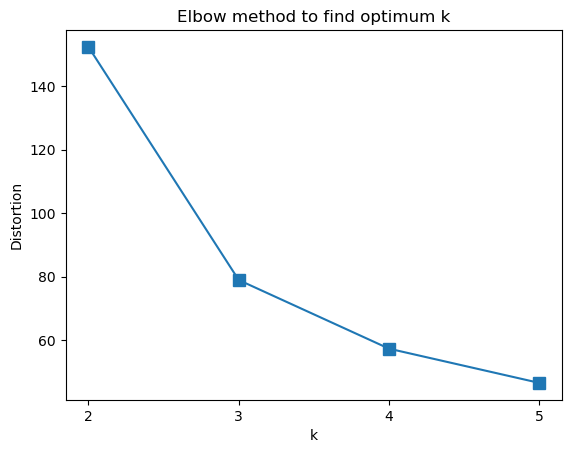

In [3]:
train_x = data.drop('species',axis = 1).values
distortion = []
K = np.arange(2,6)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_x)
    distortion.append(kmeans.inertia_)
    
    
plt.plot(K,distortion,'s-',markersize = 8)
plt.xlabel('k')
plt.xticks(K)
plt.ylabel('Distortion')
plt.title("Elbow method to find optimum k")
plt.show()

# Implementing K-means clustering 

In [4]:
k = 3
kmeans = KMeans(n_clusters = k)
kmeans.fit(train_x)
all_data = data.copy(deep = True)
centroids = pd.DataFrame(kmeans.cluster_centers_,columns = names[:-1])
centroids['cluster'] = 'centroid'
all_data['cluster'] = kmeans.labels_.astype('str')
all_data = pd.concat([all_data,centroids])

# Plotting original classes

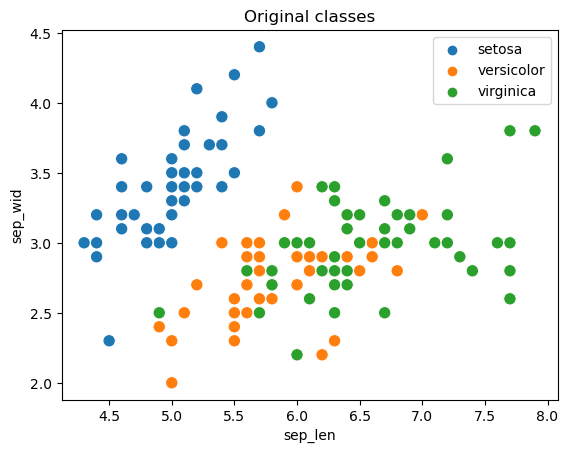

In [5]:
plt.title("Original classes")
sns.scatterplot(
    data = all_data,x = "sep_len",y = 'sep_wid',
    hue = 'species',s = 80
)
plt.legend()
plt.show()



# Original classes with cluster centroids

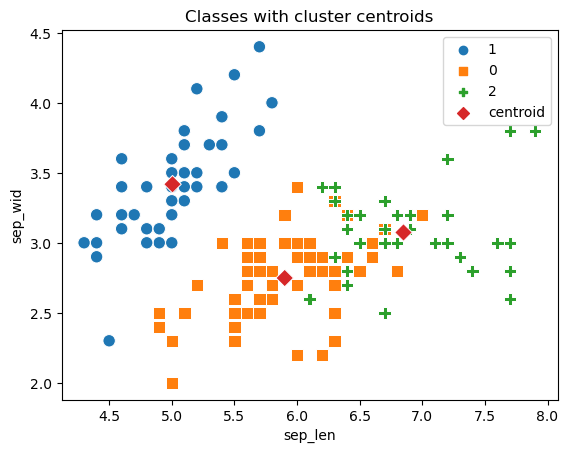

In [6]:
plt.title("Classes with cluster centroids")
sns.scatterplot(
    data = all_data,x = 'sep_len',y = 'sep_wid',
    hue = 'cluster',style = 'cluster',s =80,markers = 'osPD'
)
plt.legend()
plt.show()